<a href="https://colab.research.google.com/github/mmartigani/RoadMapIA/blob/main/66_EticaYPrivacidadipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Anonimizacion de Datos

In [2]:
import pandas as pd
import numpy as np

In [7]:
data = pd.DataFrame({
    'nombre': ['Ana', 'Juan', 'Luis', 'Pedro', 'Silvina'],
    'email': ['ana@ejemplo.com', 'juan@ejemplo.com', 'luis@ejemplo.com', 'pedro@ejemplo.com', 'silvina@ejemplo.com'],
    'edad': [22, 37, 15, 49, 63],
    'ubicacion': ['Ciudad A', 'Ciudad B', 'Ciudad C', 'Ciudad D', 'Ciudad E'],
    'salario': [55000, 34000, 76000, 51000, 62000],
    'banco': ['Banco 1', 'Banco 3', 'Banco 1', 'Banco 2', 'Banco 3']
})

data

,nombre,email,edad,ubicacion,salario,banco
0,Ana,ana@ejemplo.com,22,Ciudad A,55000,Banco 1
1,Juan,juan@ejemplo.com,37,Ciudad B,34000,Banco 3
2,Luis,luis@ejemplo.com,15,Ciudad C,76000,Banco 1
3,Pedro,pedro@ejemplo.com,49,Ciudad D,51000,Banco 2
4,Silvina,silvina@ejemplo.com,63,Ciudad E,62000,Banco 3


In [6]:
data.drop(['nombre', 'email'], axis=1, inplace=True)
data

KeyError: "['nombre', 'email'] not found in axis"

In [8]:
data['edad'] = (data['edad'] // 10) * 10
data

,nombre,email,edad,ubicacion,salario,banco
0,Ana,ana@ejemplo.com,20,Ciudad A,55000,Banco 1
1,Juan,juan@ejemplo.com,30,Ciudad B,34000,Banco 3
2,Luis,luis@ejemplo.com,10,Ciudad C,76000,Banco 1
3,Pedro,pedro@ejemplo.com,40,Ciudad D,51000,Banco 2
4,Silvina,silvina@ejemplo.com,60,Ciudad E,62000,Banco 3


In [9]:
ruido = np.random.normal(0, 100, size=data['salario'].shape)
ruido

array([-142.6288873 ,  -46.98221485,  -85.68449505,   34.0993936 ,
        -56.81484854])

In [10]:
data['salario'] += ruido
data

,nombre,email,edad,ubicacion,salario,banco
0,Ana,ana@ejemplo.com,20,Ciudad A,54857.371113,Banco 1
1,Juan,juan@ejemplo.com,30,Ciudad B,33953.017785,Banco 3
2,Luis,luis@ejemplo.com,10,Ciudad C,75914.315505,Banco 1
3,Pedro,pedro@ejemplo.com,40,Ciudad D,51034.099394,Banco 2
4,Silvina,silvina@ejemplo.com,60,Ciudad E,61943.185151,Banco 3


In [11]:
data['banco'] = np.random.permutation(data['banco'])
data

,nombre,email,edad,ubicacion,salario,banco
0,Ana,ana@ejemplo.com,20,Ciudad A,54857.371113,Banco 1
1,Juan,juan@ejemplo.com,30,Ciudad B,33953.017785,Banco 3
2,Luis,luis@ejemplo.com,10,Ciudad C,75914.315505,Banco 2
3,Pedro,pedro@ejemplo.com,40,Ciudad D,51034.099394,Banco 1
4,Silvina,silvina@ejemplo.com,60,Ciudad E,61943.185151,Banco 3


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [13]:
data = pd.DataFrame({
    'edad': [22, 45, 36, 29, 58],
    'género': ['F', 'M', 'M', 'F', 'M'],
    'contratado': [1, 0, 1, 0, 1]
})
data

,edad,género,contratado
0,22,F,1
1,45,M,0
2,36,M,1
3,29,F,0
4,58,M,1


In [14]:
agrupado = data.groupby('género')

In [15]:
for nombre, grupo in agrupado:
    print(nombre, grupo)

F    edad género  contratado
0    22      F           1
3    29      F           0
M    edad género  contratado
1    45      M           0
2    36      M           1
4    58      M           1


In [16]:
data_balanceada = pd.DataFrame()

In [17]:
for nombre, grupo in agrupado:
    grupo_balanceado = resample(grupo,
                               replace=True,
                               n_samples=10,
                               random_state=123)
    data_balanceada = pd.concat([data_balanceada, grupo_balanceado])

In [18]:
data_balanceada

,edad,género,contratado
0,22,F,1
3,29,F,0
0,22,F,1
0,22,F,1
0,22,F,1
0,22,F,1
0,22,F,1
3,29,F,0
3,29,F,0
0,22,F,1


In [19]:
#pseudonimizacion de datos

In [20]:
import pandas as pd
import uuid
import hashlib

In [21]:
data = pd.DataFrame({
    'nombre': ['Ana', 'Juan', 'Luis'],
    'email': ['ana@example.com', 'juan@example.com', 'luis@example.com'],
    'ubicacion': ['Ciudad A', 'Ciudad B', 'Ciudad C']
})

data

,nombre,email,ubicacion
0,Ana,ana@example.com,Ciudad A
1,Juan,juan@example.com,Ciudad B
2,Luis,luis@example.com,Ciudad C


In [22]:
id_pseudo = []

In [23]:
for n in range(len(data)):
    id_pseudo.append(str(uuid.uuid4()))

In [24]:
id_pseudo

['0d1485ad-c1c4-41b9-8f18-bb5157803664',
 '3fc1e6ec-8cdd-4dcd-9727-4ebc79a3bdc5',
 '6e773a21-f2da-4685-80da-aebf39704f95']

In [25]:
data['id_pseudo'] = id_pseudo
data.drop('nombre', axis=1, inplace=True)
data

,email,ubicacion,id_pseudo
0,ana@example.com,Ciudad A,0d1485ad-c1c4-41b9-8f18-bb5157803664
1,juan@example.com,Ciudad B,3fc1e6ec-8cdd-4dcd-9727-4ebc79a3bdc5
2,luis@example.com,Ciudad C,6e773a21-f2da-4685-80da-aebf39704f95


In [26]:
def hash_data(data):
    return hashlib.sha256(data.encode()).hexdigest()

In [27]:
hash_emails = []

In [28]:
for email in data['email']:
    h_email = hash_data(email)
    hash_emails.append(h_email)
data['email'] = hash_emails

data

,email,ubicacion,id_pseudo
0,8e43ca37701228e74983efdbd0cff5c16b3b1e5d4e29a7...,Ciudad A,0d1485ad-c1c4-41b9-8f18-bb5157803664
1,81b562a0fe2aecc8831e2d7c9942f319736afc2a99415e...,Ciudad B,3fc1e6ec-8cdd-4dcd-9727-4ebc79a3bdc5
2,861d62c5b964e71b42e61aeb4e876f86908a86300b15b2...,Ciudad C,6e773a21-f2da-4685-80da-aebf39704f95


In [29]:
mis_tokens = {}

In [30]:
def tokenizar(dato):
    token = str(uuid.uuid4())
    mis_tokens[token] = dato
    return token

In [31]:
def recuperar_dato(token):
    return mis_tokens.get(token, "Token no válido")

In [32]:
dato_original = "123-456-789"
token = tokenizar(dato_original)

In [33]:
print(f'Token gerado: {token}')
print(f'Dato recuperado: {recuperar_dato(token)}')

Token gerado: 970331d4-e9ab-4d83-89d6-cc90bc96669f
Dato recuperado: 123-456-789


In [34]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [35]:
# Cargar los datos en el dataframe
ruta = "/content/clientes.csv"
df = pd.read_csv(ruta)
df.head()

,nombre,direccion,edad,categoria,salario
0,Richard Martin,784 Stevens,62,0,61050
1,James Jones,729 Neruda,65,1,53824
2,Patricia Wilson,935 Dickinson,18,0,60281
3,Elizabeth Robinson,459 Rilke,21,1,42187
4,Charles Brown,823 Ginsberg,21,1,37589


In [36]:
# Anonimizar el campo dirección a través de la eliminación
df.drop('direccion', axis=1, inplace=True)
df.head()

,nombre,edad,categoria,salario
0,Richard Martin,62,0,61050
1,James Jones,65,1,53824
2,Patricia Wilson,18,0,60281
3,Elizabeth Robinson,21,1,42187
4,Charles Brown,21,1,37589


In [37]:
# Anonimizar el campo edad a través del redondeo
df['edad'] = (df['edad'] // 10) * 10
df

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61050
1,James Jones,60,1,53824
2,Patricia Wilson,10,0,60281
3,Elizabeth Robinson,20,1,42187
4,Charles Brown,20,1,37589
...,...,...,...,...
195,Barbara Jones,40,0,51931
196,Richard Brown,30,1,47712
197,Mary Garcia,60,1,45261
198,James Wilson,40,1,46787


In [38]:
# Anonimizar el campo salario a través de la agregación de ruido
ruido = np.random.normal(0, 100, size=df['salario'].shape)
df['salario'] += ruido
df

,nombre,edad,categoria,salario
0,Richard Martin,60,0,61164.327350
1,James Jones,60,1,53788.298132
2,Patricia Wilson,10,0,60370.222257
3,Elizabeth Robinson,20,1,42237.406626
4,Charles Brown,20,1,37596.022651
...,...,...,...,...
195,Barbara Jones,40,0,51990.082927
196,Richard Brown,30,1,47685.487083
197,Mary Garcia,60,1,45292.000713
198,James Wilson,40,1,46652.933652


In [39]:
# Pseudonimizar el campo nombre
for i in range(len(df)):
    df.loc[i, 'nombre'] = 'Cliente' + str(i)
df.head()

,nombre,edad,categoria,salario
0,Cliente0,60,0,61164.327350
1,Cliente1,60,1,53788.298132
2,Cliente2,10,0,60370.222257
3,Cliente3,20,1,42237.406626
4,Cliente4,20,1,37596.022651


In [40]:
# Balancear los datos de categorías
agrupado = df.groupby('categoria')

df_balanceado = pd.DataFrame()

for nombre, grupo in agrupado:
    grupo_balanceado = resample(grupo,
                              replace=True,
                              n_samples=100,
                              random_state=123)
    df_balanceado = pd.concat([df_balanceado, grupo_balanceado])

df_balanceado

,nombre,edad,categoria,salario
158,Cliente158,50,0,41753.536859
42,Cliente42,30,0,59397.640551
194,Cliente194,40,0,49768.442864
133,Cliente133,50,0,41924.868935
114,Cliente114,60,0,53542.928316
...,...,...,...,...
179,Cliente179,40,1,54283.142211
80,Cliente80,10,1,56357.311367
93,Cliente93,50,1,49595.410628
156,Cliente156,50,1,48096.987846


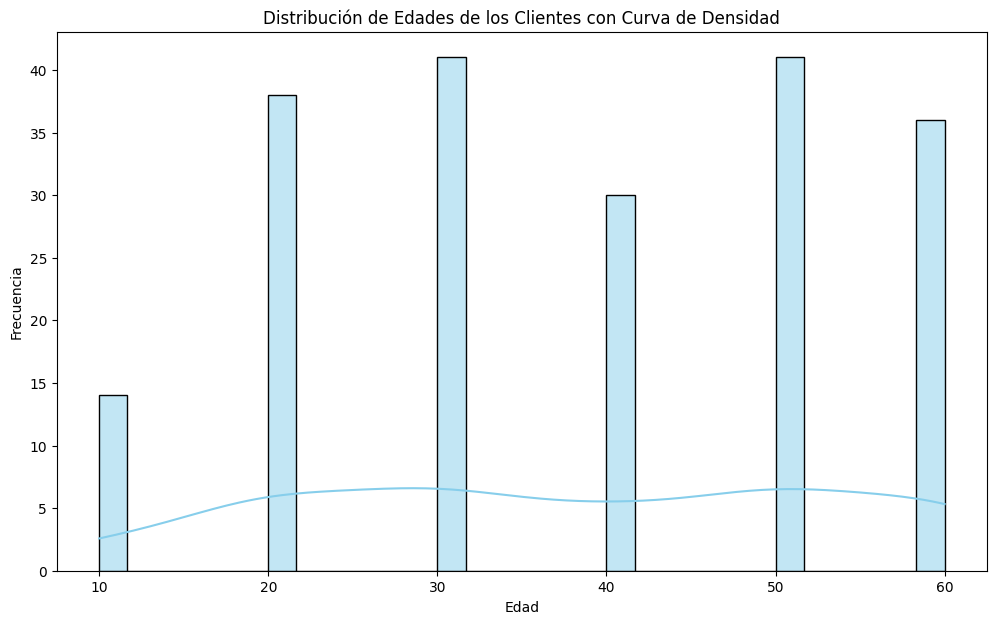

In [41]:
# Visualización 1: Distribución de las edades con curva de densidad
plt.figure(figsize=(12, 7))
ax = sns.histplot(df['edad'],
                  kde=True,
                  color='skyblue',
                  bins=30)
ax.set(title='Distribución de Edades de los Clientes con Curva de Densidad',
       xlabel='Edad',
       ylabel='Frecuencia');

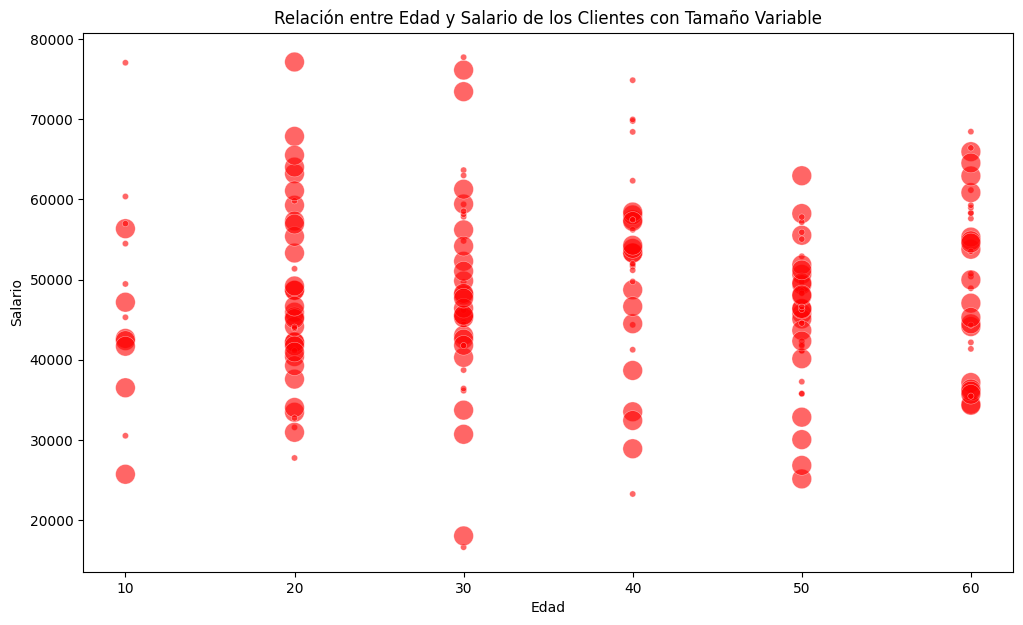

In [42]:
# Visualización 2: Relación entre Edad y Salario con tamaño variable
plt.figure(figsize=(12, 7))
sizes = df['categoria'].replace({0: 50, 1: 100})  # Asignar tamaño según categoría para ilustrar
scatter = sns.scatterplot(x='edad',
                          y='salario',
                          size=sizes,
                          legend=False,
                          sizes=(20, 200),
                          data=df,
                          color='red',
                          alpha=0.6)
scatter.set(title='Relación entre Edad y Salario de los Clientes con Tamaño Variable',
            xlabel='Edad',
            ylabel='Salario');

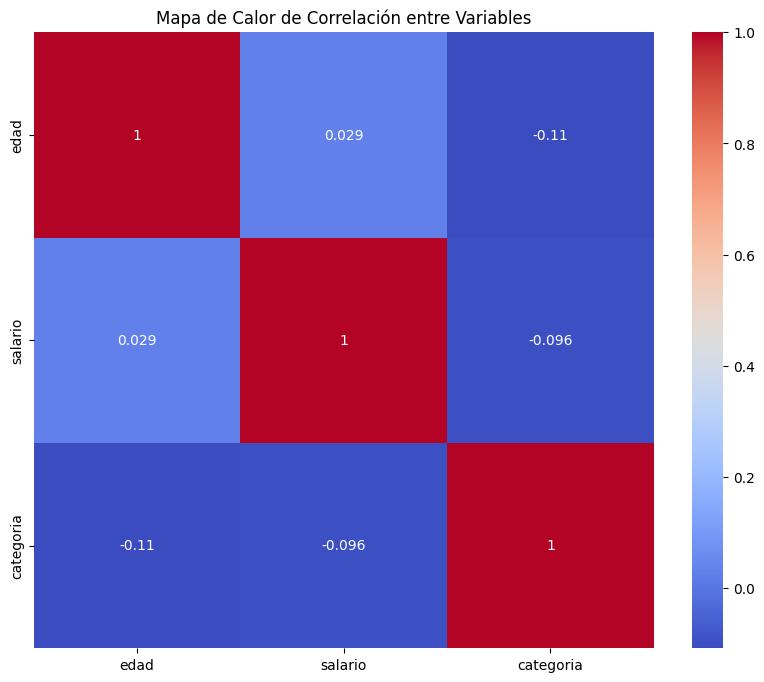

In [43]:
# Visualización 3: Mapa de Calor de Correlación entre Variables
plt.figure(figsize=(10, 8))
# Calculamos la matriz de correlación
correlation_matrix = df[['edad', 'salario', 'categoria']].corr()
heatmap = sns.heatmap(correlation_matrix,
                      annot=True,
                      cmap='coolwarm')
heatmap.set(title='Mapa de Calor de Correlación entre Variables');